
Week 2 Assignment - Part 1

Venkat Neelraj Nitta

College Of Professional Studies, Northeastern University

EAI6080: Advanced Analytical Utilization

Instructor: Mimoza Dimodugno PhD

Oct 3rd, 2025



Part 1- Conceptual understanding of ANN workflow

In this section, I  explained about Feedforward and Gradient Descent concepts in DeepLearning by step-by-step “what” each is and “how” it is conducted mathematically and programmatically.


Suppose we want to predict our test score based on how many hours we sleep and how many hours we study the night before.

In other words, we want to predict output value y
 which are scores for a given set of input values X
 which are hours of (sleep, study).

 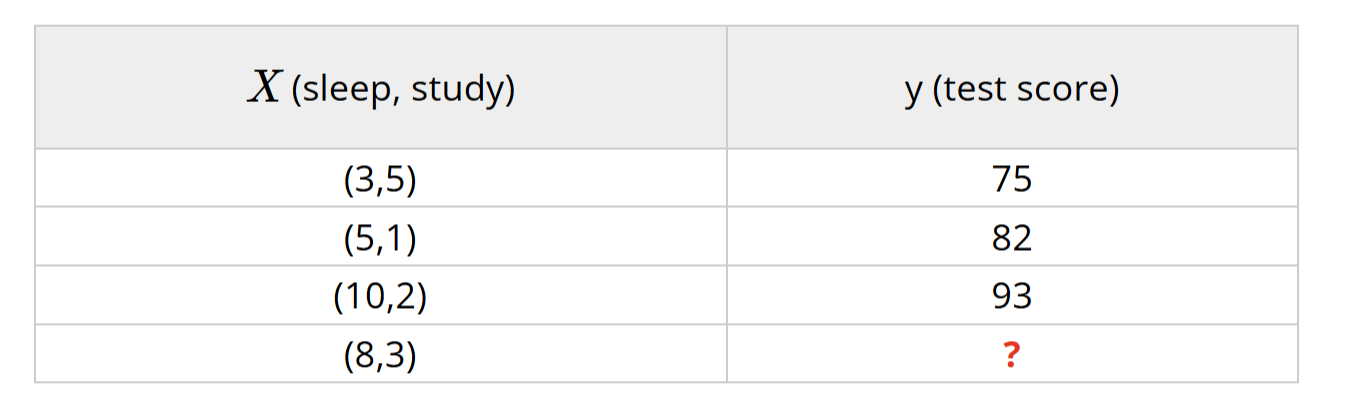

In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
import numpy as np

In our machine learning approach, we'll use the python to store our data in 2-dimensional numpy arrays.

In [55]:
X = np.array(([3,5],[5,1],[10,2]), dtype=float)
y = np.array(([75],[82],[93]), dtype=float)

In [56]:
print(X.shape,y.shape)

(3, 2) (3, 1)


We'll use the data to train a model to predict how we will do on our next test.

This is a supervised regression problem.

It's supervised because our examples have outputs(y).

We may want to scale our data so that the result should be in [0,1].

In [57]:
X = X/np.amax(X, axis= 0)
y = y/100

In [58]:
print("X:\n",X)
print("y:\n",y)

X:
 [[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]
y:
 [[0.75]
 [0.82]
 [0.93]]


Now we can start building our Neural Network. We know our network must have 2 inputs($X$) and 1 output($y$).



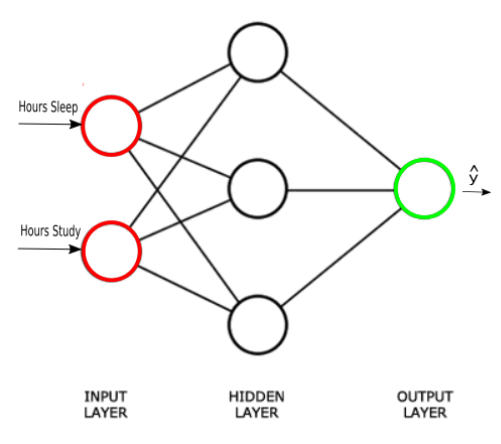



We'll call our output $\hat y$, because it's an estimate of y. Any layer between our input and output layer is called a hidden layer. Here, we're going to use just one hidden layer with 3 neurons

In [59]:
class NeuralNetwork(object):
    def __init__(self):
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
    def forwardPropagation(self, X):
      #Propagate inputs though network
      pass
    def sigmoid(self,z):
      #Apply sigmoid activation function to scalar, vector or matrix
      return 1/(1+np.exp(-z))

Activation Function - Sigmoid

Now that we have the activities for our second layer, $z^{(2)} = XW^{(1)}$,we need to apply the activation function.

We'll independently apply the sigmoid function to each entry in matrix
z


By using numpy we'll apply the activation function element-wise, and return a result of the same dimension as it was given:

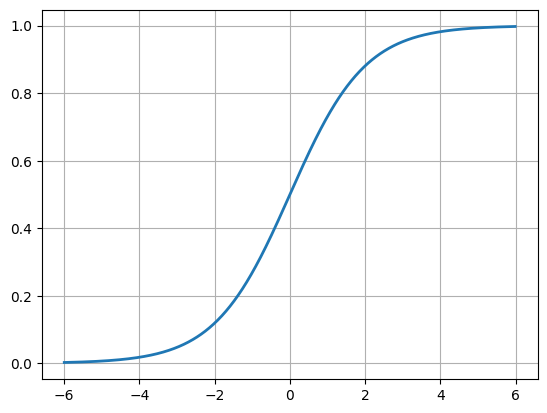

In [60]:
NN = NeuralNetwork()
testInput = np.arange(-6,6,0.01)
plot(testInput,NN.sigmoid(testInput),linewidth=2)
grid(1)

Let's see how the sigmoid() takes an input and how returns the result:

The following calls for the sigmoid() with args : a number (scalar), 1-D (vector), and 2-D arrays (matrix).

In [61]:
NN.sigmoid(1)

np.float64(0.7310585786300049)

In [62]:
NN.sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

In [63]:
NN.sigmoid(np.random.randn(3,3))

array([[0.4033055 , 0.14866127, 0.45282924],
       [0.37117084, 0.55397757, 0.76732736],
       [0.43308987, 0.29891851, 0.57855866]])

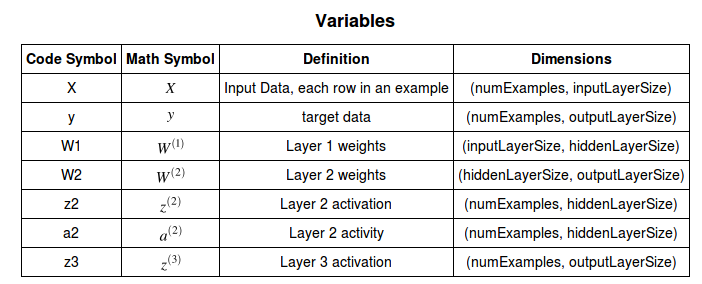

$$z^{(2)} = X W^{(1)}$$

$$a^{(2)} = f(z^{(2)})$$

$$z^{(3)} = a^{(2)} W^{(2)}$$

$$\hat y = f(z^{(3)})$$

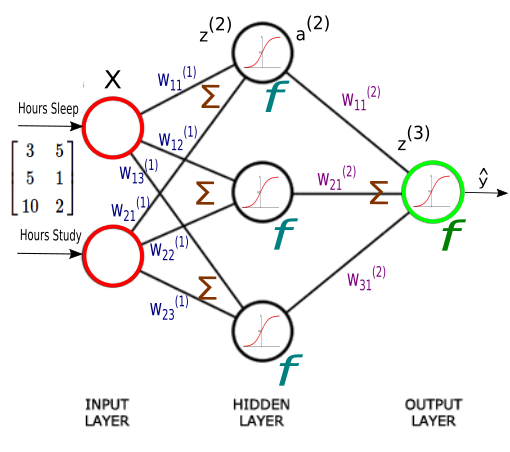




Each input value in matrix X should be multiplied by a corresponding weight and then added together with all the other results for each neuron.

$z^{(2)}$  is the activity of our second layer and it can be calculated as the following:

$z^{(2)} = XW^{(1)}$

= $\begin{bmatrix}
        3 & 5  \\
        5 & 1  \\
        10 & 2  
\end{bmatrix}$
$\begin{bmatrix}
        W_{11}^{(1)} & W_{12}^{(1)}  & W_{13}^{(1)}\\
        W_{21}^{(1)} & W_{22}^{(1)}  & W_{23}^{(1)}  
\end{bmatrix}$

= $\begin{bmatrix}
3 W_{11}^{(1)} + 5 W_{21}^{(1)} & 3 W_{12}^{(1)} + 5 W_{22}^{(1)} & 3 W_{13}^{(1)} + 5 W_{23}^{(1)} \\
5 W_{11}^{(1)} +  W_{21}^{(1)} & 5 W_{12}^{(1)} +  W_{22}^{(1)} & 5 W_{13}^{(1)} + W_{23}^{(1)} \\
10 W_{11}^{(1)} + 2 W_{21}^{(1)} & 10 W_{12}^{(1)} + 2 W_{22}^{(1)} & 10 W_{13}^{(1)} + 2 W_{23}^{(1)}
\end{bmatrix}$


Note that each entry in
z
 is a sum of weighted inputs to each hidden neuron.
z
 is
3
×
3
 matrix, one row for each sample, and one column for each hidden unit.

#Implementing Feedforward propagation


We now have our second formula for forward propagation, using our activation function($f$), we can write that our second layer activity:
$a^{(2)} = f \left( z^{(2)} \right)$. The $a^{(2)}$ will be a matrix of same size ($3 \times 3$):

$$a^{(2)} = f(z^{(2)})$$

To finish forward propagation we want to propagate $a^{(2)}$ all the way to the output, $\hat y$

All we have to do now is multiply $a^{(2)}$ by our second layer weights $W^{(2)}$ and apply one more activation function. The $W^{(2)}$
will be of size ($3 \times 1$) results in a ($3 \times 1$) matrix $z^{(3)}$, the activity of our 3rd layer. The $z^{(3)}$  has three activity values, one for each sample.

Then, we'll apply our activation function to $z^{(3)}$ yielding our estimate of test score, $\hat y$

$$\hat y = f(z^{(3)})$$

Now we are ready to implement forward propagation in our forwardPropagation() method, using numpy's built in dot method for matrix multiplication:




In [64]:
class NeuralNetwork(object):
    def __init__(self):
        #Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        #Weights
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)

    def forwardPropagation(self, X):
      #Propagate inputs though network
      self.z2 = np.dot(X,self.W1)
      self.a2 = self.sigmoid(self.z2)
      self.z3 = np.dot(self.a2,self.W2)
      yHat = self.sigmoid(self.z3)
      return yHat

    def sigmoid(self,z):
      #Apply sigmoid activation function to scalar, vector or matrix
      return 1/(1+np.exp(-z))

Getting estimate of test score

Now we have a class capable of estimating our test score given how many hours we sleep and how many hours we study. We pass in our input data (X) and get real outputs (y^).



In [65]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [66]:
NN = NeuralNetwork()
yHat = NN.forwardPropagation(X)

In [67]:
yHat

array([[0.29055866],
       [0.37224453],
       [0.32907562]])

In [68]:
y

array([[0.75],
       [0.82],
       [0.93]])

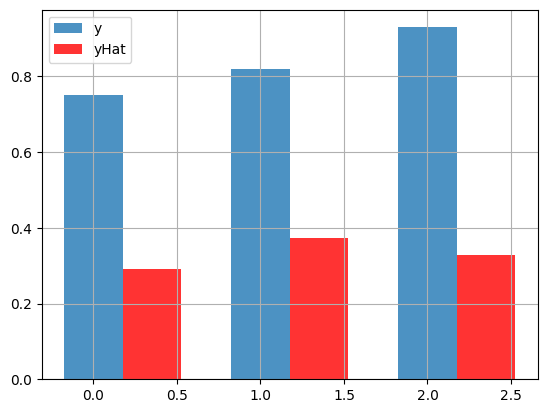

In [69]:
#compare estimate yHat, to actual y
bar([0,1,2],y.flatten(),width =0.35, alpha =0.8)
bar([0.35,1.35,2.35],yHat.flatten(), width =0.35, color = 'r', alpha =0.8)
grid(1)
legend(['y','yHat'])

Note that our estimates (y^) looks quite terrible when compared with our target (y). That's because we have not yet trained our network,

##Cost function J

To improve our poor model, we first need to find a way of quantifying exactly how wrong our predictions are.

One way of doing it is to use a cost function. For a given sample, a cost function tells us how costly our models is.

We'll use sum of square errors to compute an overall cost and we'll try to minimize it. Actually, training a network means minimizing a cost function.

$J = \sum_{i=1}^N (y_i-\hat y_i)$

where the $N$ is the number of training samples.

As we can see from equation, the cost is a function of two things: our sample data and the weights on our synapses. Since we don't have much control of our data, we'll try to minimize our cost by changing the weights.

We have a collection of 9 weights:

$$
W^{(1)} =
\begin{bmatrix}
W_{11}^{(1)} & W_{12}^{(1)} & W_{13}^{(1)} \\
W_{21}^{(1)} & W_{22}^{(1)} & W_{23}^{(1)}
\end{bmatrix}
$$


$$
W^{(2)} =
\begin{bmatrix}
W_{11}^{(2)} \\
W_{21}^{(2)} \\
W_{31}^{(2)}
\end{bmatrix}
$$



and we're going to make our cost ($J$) as small as possible with a optimal combination of the weights.

# Curse of dimensionality

Well, we're not there yet. Considering the 9 weights, finding the right combination that gives us minimum $J$
 may be costly.

Let's try the case when we tweek only one weight value ($W_{11}^{(1)}$) in the range [-5,5] with 1000 try. Other weights remain untouched with the values of randomly initialized in "__init__()" method:

In [70]:
#Here is the code for the 1-weight:
import time
weightToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.perf_counter()
for i in range(1000):
  NN.W1[0,0] = weightToTry[i]
  yHat = NN.forwardPropagation(X)
  costs[i] = 0.5*sum((y-yHat)**2)
endTime = time.perf_counter()

In [71]:
elapsedTime = endTime - startTime
elapsedTime

0.02155114799961666

It takes about 0.03 seconds to check 1000 different weight values for our neural network. Since we've computed the cost for a wide range values of $W$, we can just pick the one with the smallest cost, let that be our weight, and we've trained our network.

Text(0.5, 0, 'Weight')

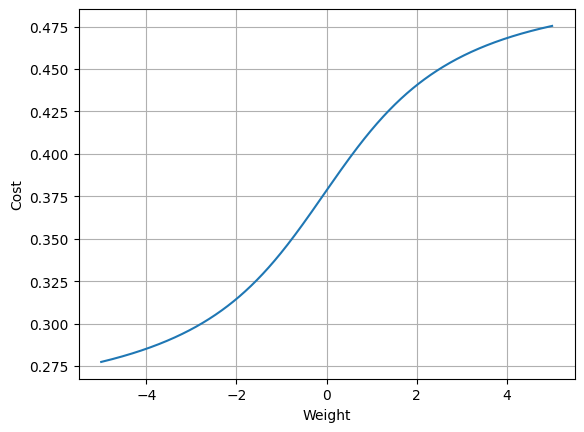

In [72]:
#Here is the plot for the 1000 weights:
plot(weightToTry,costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

In [73]:
#Here is the code for the 2-weight:
import time
n = 1000*1000
weightToTry = np.linspace(-5,5,n)
costs = np.zeros(n)

startTime = time.perf_counter()
for i in range(n):
  NN.W1[0,0] = weightToTry[i]
  NN.W1[0,1] = weightToTry[i]
  # NN.W1[0,2] = weightToTry[i]
  # NN.W1[1,0] = weightToTry[i]
  # NN.W1[1,1] = weightToTry[i]
  # NN.W1[1,2] = weightToTry[i]
  # NN.W2[0,0] = weightToTry[i]
  # NN.W2[1,0] = weightToTry[i]
  # NN.W2[2,0] = weightToTry[i]
  yHat = NN.forwardPropagation(X)
  costs[i] = 0.5*sum((y-yHat)**2)
endTime = time.perf_counter()

elapsedTime = endTime - startTime
elapsedTime

21.062182210000174

For 1 million evaluations, it took an 22 seconds! The real curse of dimensionality kicks in as we continue to add dimensions. Searching through three weights would take a billion evaluations, 22*1000 sec = 6 hrs!

#Gradient descent method
So, we may want to use gradient descent algorithm to get the weights that take $J$  to minimum. Though it may not seem so impressive in one dimension, it is capable of incredible speedups in higher dimensions.

Though we have two choices of the gradient descent: batch(standard) or stochastic, we're going to use the batch to train our Neural Network.

In batch gradient descent method sums up all the derivatives of $J$ for all samples: $\sum \frac {\partial J}{\partial W}$

while the stochastic gradient descent (SGD) method uses one derivative at one sample and move to another sample point: $\frac {\partial J}{\partial W}$
